In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import pylab as plt

from astropy.stats import sigma_clip

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from rotate import shiftRotateXYZ
from parabolas import loadLeicaData
from grid import regridXYZ, regridXYZMasked
from zernikies import getZernikeCoeffs, zernikePoly
from plotting import surfacePlot, MidpointNormalize
from utils.utils import midPoint, radialMask, gridLimits

In [3]:
def prepareData(filename, n=512, rot=178.):
    orgData, cleanData = loadLeicaData(filename, n=None, numpy=False)
    x = orgData[0]
    y = orgData[1]
    z = orgData[2]
    xg, yg, zg = regridXYZ(x, y, z, n=n)
    xg, yg, zg = shiftRotateXYZ(xg, yg, zg, [0, 0, 0, 0, 0, np.deg2rad(rot)])
    
    return xg, yg, zg

In [4]:
n = 512
rot = 179.5
scanDir = '/home/scratch/psalas/LASSI/gpus/output/'

In [5]:
%%time
refScan = "{0}/2020_03_16_ref_average.ptx.csv".format(scanDir)
xr, yr, zr = prepareData(refScan, n=n, rot=rot)

CPU times: user 7.74 s, sys: 1.71 s, total: 9.45 s
Wall time: 6.79 s


<IPython.core.display.Javascript object>


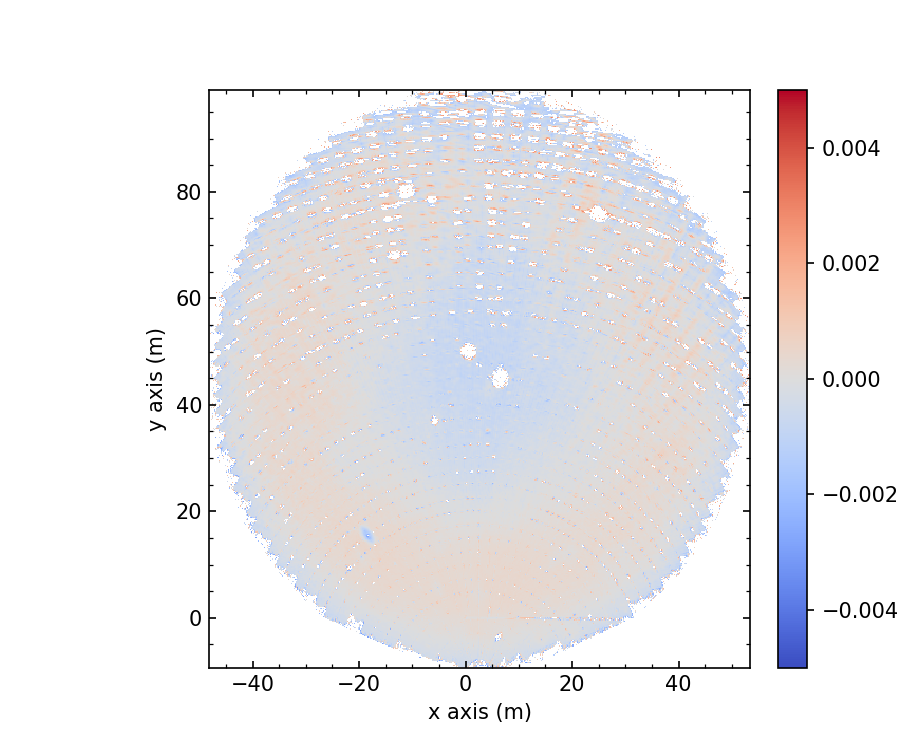

In [9]:
sigScan = "{0}/2020_03_16_09:09:14.ptx.csv".format(scanDir) # C13=-534
xs, ys, zs = prepareData(sigScan, n=n, rot=rot)

xmin, xmax = gridLimits(xs, xr)
ymin, ymax = gridLimits(ys, yr)
xrg, yrg, zrg = regridXYZ(xr, yr, zr, n=n, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
xsg, ysg, zsg = regridXYZ(xs, ys, zs, n=n, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

diff = sigma_clip(np.ma.masked_invalid(zsg - zrg))

fl_fs = getZernikeCoeffs(diff.filled(0)[::-1].T, 36, norm='active-surface')
fl_fs_sub = np.copy(fl_fs)
fl_fs_sub[2] *= -1.
zpoly_ = zernikePoly(xrg, yrg, midPoint(xrg), midPoint(yrg), fl_fs_sub[:4])
diff_13 = diff - zpoly_

surfacePlot(xrg, yrg, diff_13.T)

<IPython.core.display.Javascript object>


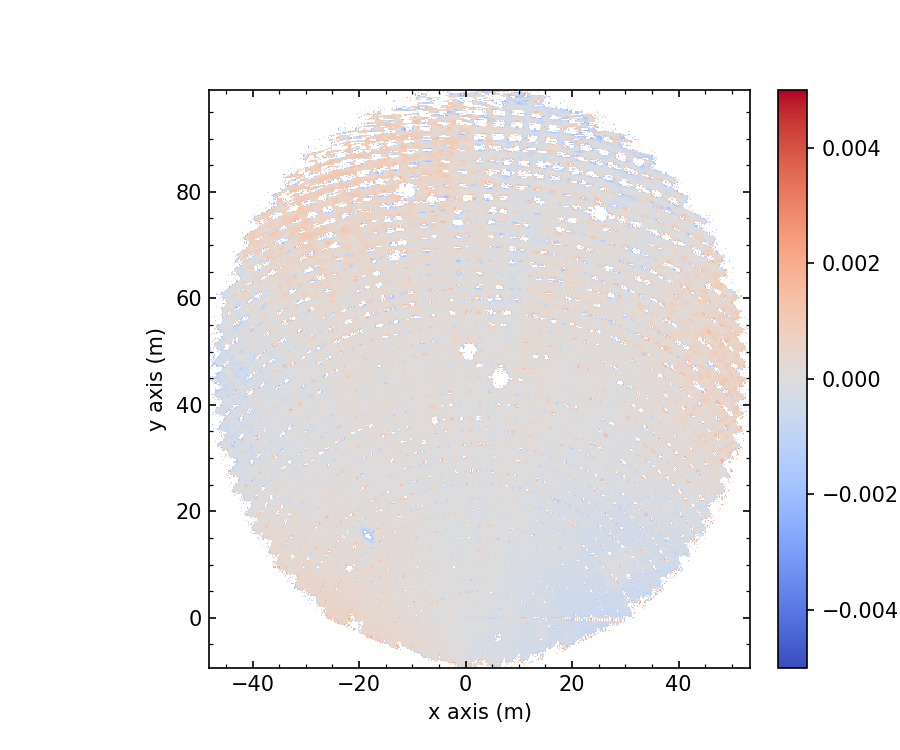

CPU times: user 1min 11s, sys: 5.51 s, total: 1min 17s
Wall time: 1min 7s


In [10]:
%%time
sigScan = "{0}/2020_03_16_07:56:13.ptx.csv".format(scanDir) # C7=-554
xs, ys, zs = prepareData(sigScan, n=n, rot=rot)

xmin, xmax = gridLimits(xs, xr)
ymin, ymax = gridLimits(ys, yr)
xrg, yrg, zrg = regridXYZ(xr, yr, zr, n=n, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
xsg, ysg, zsg = regridXYZ(xs, ys, zs, n=n, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

diff = sigma_clip(np.ma.masked_invalid(zsg - zrg))

fl_fs = getZernikeCoeffs(diff.filled(0)[::-1].T, 36, norm='active-surface')
fl_fs_sub = np.copy(fl_fs)
fl_fs_sub[2] *= -1.
zpoly_ = zernikePoly(xrg, yrg, midPoint(xrg), midPoint(yrg), fl_fs_sub[:4])
diff_7 = diff - zpoly_

surfacePlot(xrg, yrg, diff_7.T)

<IPython.core.display.Javascript object>


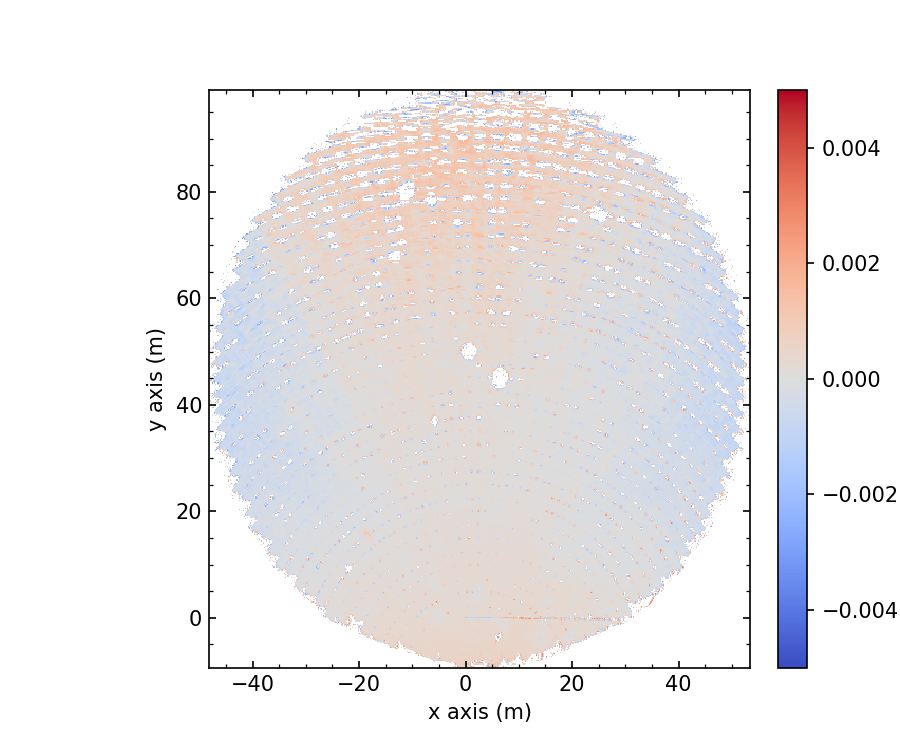

CPU times: user 1min 27s, sys: 5.06 s, total: 1min 32s
Wall time: 1min 23s


In [11]:
%%time
sigScan = "{0}/2020_03_16_06:43:17.ptx.csv".format(scanDir) # C4=-562
xs, ys, zs = prepareData(sigScan, n=n, rot=rot)

xmin, xmax = gridLimits(xs, xr)
ymin, ymax = gridLimits(ys, yr)
xrg, yrg, zrg = regridXYZ(xr, yr, zr, n=n, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
xsg, ysg, zsg = regridXYZ(xs, ys, zs, n=n, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

diff = sigma_clip(np.ma.masked_invalid(zsg - zrg))

fl_fs = getZernikeCoeffs(diff.filled(0)[::-1].T, 36, norm='active-surface')
fl_fs_sub = np.copy(fl_fs)
fl_fs_sub[2] *= -1.
zpoly_ = zernikePoly(xrg, yrg, midPoint(xrg), midPoint(yrg), fl_fs_sub[:4])
diff_4 = diff - zpoly_

surfacePlot(xrg, yrg, diff_4.T)

In [17]:
mx = midPoint(xsg)
my = midPoint(ysg)
extent = [xsg.min() - mx, xsg.max() - mx, ysg.min() - my, ysg.max() - my]

<IPython.core.display.Javascript object>


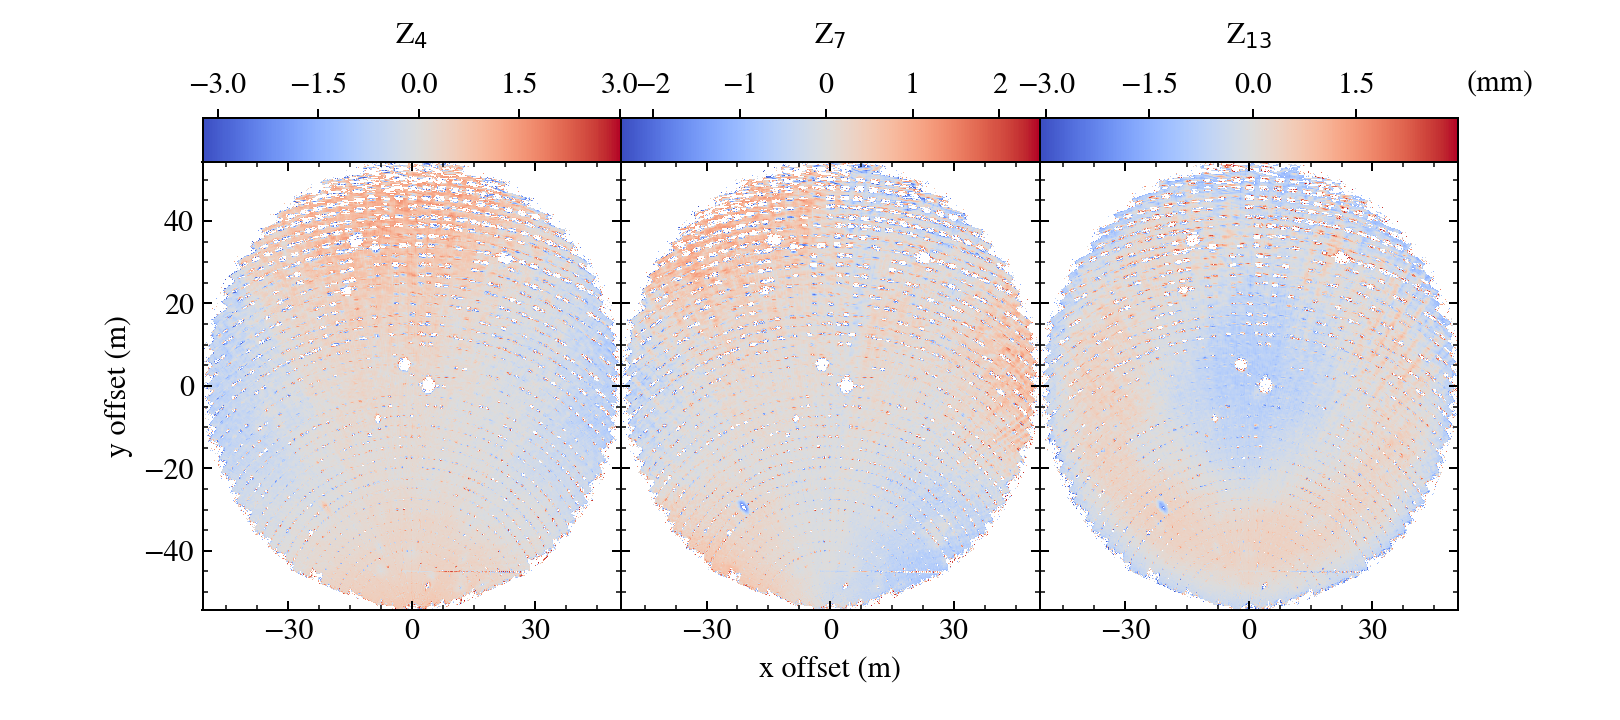

/home/scratch/psalas/LASSI/lassi-analysis_v2/psalas_lassi_env/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [33]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

plt.matplotlib.rc('font', **{'family':'STIXGeneral', 'weight':'normal'})
plt.matplotlib.rc('text', usetex=False)
plt.matplotlib.rcParams.update({'font.size': 12})

cmap = plt.matplotlib.cm.coolwarm
cmap.set_bad(color='white')

f = plt.figure(figsize=(9,4), dpi=180)
plt.subplots_adjust(wspace=0., hspace=0.)

ax1 = f.add_subplot(131)

norm = MidpointNormalize(midpoint=0., vmin=np.nanmin(diff_4)*1e3, vmax=np.nanmax(diff_4)*1e3)
im1 = ax1.imshow(diff_4.T[::-1].filled(np.nan)*1e3, extent=extent, cmap=cmap, norm=norm)

ax1_divider = make_axes_locatable(ax1)
# add an axes above the main axes.
cax1 = ax1_divider.append_axes("top", size="10%", pad="0%")
cb1 = colorbar(im1, cax=cax1, orientation="horizontal")
# change tick position to top. Tick position defaults to bottom and overlaps
# the image.
cax1.xaxis.set_ticks_position("top")

ax1.minorticks_on()
ax1.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

nbins = len(ax1.get_xticklabels())-1
ax1.xaxis.set_major_locator(plt.matplotlib.ticker.MaxNLocator(nbins=nbins, prune='both'))

ax1.text(0.5, 1.25, r'Z$_{4}$', transform=ax1.transAxes, ha='center', va='bottom')

ax1.set_ylabel('y offset (m)')

ax2 = f.add_subplot(132)

norm = MidpointNormalize(midpoint=0., vmin=np.nanmin(diff_7)*1e3, vmax=np.nanmax(diff_7)*1e3)
im2 = ax2.imshow(diff_7.T[::-1].filled(np.nan)*1e3, extent=extent, cmap=cmap, norm=norm)

ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("top", size="10%", pad="0%")
cb2 = colorbar(im2, cax=cax2, orientation="horizontal")
cax2.xaxis.set_ticks_position("top")

ax2.minorticks_on()
ax2.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)
ax2.set_yticklabels([])

nbins = len(ax2.get_xticklabels())-1
ax2.xaxis.set_major_locator(plt.matplotlib.ticker.MaxNLocator(nbins=nbins, prune='both'))

ax2.text(0.5, 1.25, r'Z$_{7}$', transform=ax2.transAxes, ha='center', va='bottom')

ax2.set_xlabel('x offset (m)')

ax3 = f.add_subplot(133)

norm = MidpointNormalize(midpoint=0., vmin=np.nanmin(diff_13)*1e3, vmax=np.nanmax(diff_13)*1e3)
im3 = ax3.imshow(diff_13.T[::-1].filled(np.nan)*1e3, extent=extent, cmap=cmap, norm=norm)

ax3_divider = make_axes_locatable(ax3)
cax3 = ax3_divider.append_axes("top", size="10%", pad="0%")
cb3 = colorbar(im3, cax=cax3, orientation="horizontal")
cax3.xaxis.set_ticks_position("top")

ax3.minorticks_on()
ax3.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)
ax3.set_yticklabels([])

nbins = len(ax3.get_xticklabels())-1
ax3.xaxis.set_major_locator(plt.matplotlib.ticker.MaxNLocator(nbins=nbins, prune='lower'))

ax3.text(0.5, 1.25, r'Z$_{13}$', transform=ax3.transAxes, ha='center', va='bottom')
ax3.text(1.1, 1.145, '(mm)', transform=ax3.transAxes, ha='center', va='bottom')

#plt.tight_layout()

plt.savefig('March2020_Z_examples.pdf',
            bbox_inches='tight',
            pas_inches=0.06)